In [ ]:
!unzip /content/IdDoswithAttackFree.zip

Archive:  /content/IdDoswithAttackFree.zip
  inflating: AttackDoswithAttackFree.txt  
  inflating: IdDoswithAttackFree.txt  


In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 11.9MB 1.5MB/s 
     |████████████████████████████████| 24.3MB 1.4MB/s 
     |████████████████████████████████| 194kB 4.2MB/s 
     |████████████████████████████████| 235kB 6.0MB/s 
     |████████████████████████████████| 2.2MB 7.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 


In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 3, 4],
                           [1, 0, 1, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [ ]:
import numpy as np


fileId = open('/content/IdDoswithAttackFree.txt', 'r')
fileA = open('/content/AttackDoswithAttackFree.txt','r')
detectList = []
counter = 1
graphList = []
ultimateGraphList = [] 
utlimateaDetectionList = []
graphCounter = 0


messageSize = 200

for line in fileId:
  node = line.split()[0]


  graphList.append(node)
  

  if len(graphList) == messageSize: 
    ultimateGraphList.append(graphList)


    
  
   

    graphList = []
   
   

ugl = ultimateGraphList

for line in fileA:
  attackChecking = line.split()[0]


  detectList.append(attackChecking)
  

  if len(detectList) == messageSize: 
    utlimateaDetectionList.append(detectList)


    detectList = []

udl = utlimateaDetectionList


print(len(ugl))
print(len(udl))

print(ugl[0])
print(len(ugl[0]))
print(len(udl[0]))
print(udl[0])
print(udl[3])

36894
36894
['0316', '018f', '0260', '02a0', '0329', '0545', '0002', '0153', '02c0', '0130', '0131', '0140', '0350', '043f', '0370', '0440', '0316', '018f', '0260', '02a0', '0329', '04f0', '0545', '0430', '04b1', '01f1', '0153', '0002', '02c0', '0350', '0130', '0131', '0140', '0370', '043f', '0440', '05f0', '018f', '0260', '02a0', '0316', '0329', '0545', '0002', '0153', '02c0', '0130', '0131', '0140', '0350', '043f', '0370', '00a0', '00a1', '0440', '0316', '018f', '0260', '02a0', '0329', '04f0', '0545', '0430', '04b1', '01f1', '0153', '0002', '02c0', '0350', '0130', '0131', '0140', '0370', '043f', '0440', '0316', '018f', '0260', '02a0', '0329', '0545', '0002', '0153', '02c0', '0130', '0131', '0140', '0350', '043f', '0370', '0440', '0316', '018f', '0260', '02a0', '0329', '04f0', '0545', '0690', '0430', '04b1', '01f1', '0153', '0002', '02c0', '0350', '0130', '0131', '0140', '0370', '043f', '0440', '0316', '018f', '0260', '02a0', '0329', '0545', '0002', '0153', '02c0', '0130', '0131', '01

In [ ]:
#Making graph from the 200 sequential of id and store them in a file as Graph adjacent list
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
import torch
from scipy.sparse import csr_matrix
from torch_geometric.data import Data, DataLoader
gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

lenugl = len(ugl)

#fileW = open("DosAttackGraph.txt","w")

counter = 0
gAttackfreeCounter = 0
gAttackedCounter = 0



allLabelList = []
nodeFeatureList = []
uvList = []
DataList = []
for i in range(0,lenugl):
  uList = []
  vList = []
  attackFree = 0
  fList = []
  all_unique_nodes = list(set(ugl[i]))
  ln = len(all_unique_nodes)
  array = np.zeros((ln,ln))

  for j in range (0, len(ugl[i])-1):
     u = all_unique_nodes.index(ugl[i][j])
     v = all_unique_nodes.index(ugl[i][j+1])
     uList.append(u)
     vList.append(v)
     array[u][v] = array[u][v]+1
  uvList.append([uList,vList])
  edge_index =  torch.LongTensor([uList,vList])
  
  for k in range(len(array)):
    indeg = 0
    outdeg = 0
    for l in range(len(array[k])):
      outdeg = outdeg + array[k][l]
      indeg = indeg + array[l][k]
    fList.append([indeg,outdeg])
  
  nodeFeatureList.append(fList)
  x = torch.FloatTensor(fList)


  for j in range (0,len(udl[i])):
    if str(udl[i][j]) == 'D': 
      attackFree = 1
      break

  y = attackFree
  
  allLabelList.append(attackFree)

  DataList.append(Data(x = x,edge_index=edge_index,y=y))




print(uvList[0])
print(allLabelList.count(0))

print(allLabelList.count(1))
print(nodeFeatureList[3])


loader = DataLoader(DataList, batch_size=32)

print(loader)
  








[[21, 20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 12, 21, 20, 8, 15, 3, 5, 10, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 4, 20, 8, 15, 21, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 16, 7, 12, 21, 20, 8, 15, 3, 5, 10, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 21, 20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 12, 21, 20, 8, 15, 3, 5, 10, 19, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 21, 20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 12, 21, 20, 8, 15, 3, 5, 10, 4, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 21, 20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 12, 21, 20, 8, 15, 3, 5, 10, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 17, 18, 12, 21, 20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17], [20, 8, 15, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 12, 21, 20, 8, 15, 3, 5, 10, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 4, 20, 8, 15, 21, 3, 10, 9, 0, 2, 6, 14, 11, 1, 17, 18, 16, 7, 12, 21, 20, 8, 15, 3, 5, 10, 22, 23, 13, 0, 9, 2, 1, 6, 14, 11, 18, 17, 12, 21, 20, 8, 15, 3, 10,

In [ ]:
import random 


torch.manual_seed(12345)
random.Random(5).shuffle(DataList)

dataset = DataList




train_size = int(lenugl*.70)

#print(int(train_size))


train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:lenugl]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 25825
Number of test graphs: 11069


In [ ]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
Batch(batch=[1570], edge_index=[2, 12736], x=[1570, 2], y=[64])

Step 2:
Number of graphs in the current batch: 64
Batch(batch=[1559], edge_index=[2, 12736], x=[1559, 2], y=[64])

Step 3:
Number of graphs in the current batch: 64
Batch(batch=[1556], edge_index=[2, 12736], x=[1556, 2], y=[64])

Step 4:
Number of graphs in the current batch: 64
Batch(batch=[1571], edge_index=[2, 12736], x=[1571, 2], y=[64])

Step 5:
Number of graphs in the current batch: 64
Batch(batch=[1569], edge_index=[2, 12736], x=[1569, 2], y=[64])

Step 6:
Number of graphs in the current batch: 64
Batch(batch=[1569], edge_index=[2, 12736], x=[1569, 2], y=[64])

Step 7:
Number of graphs in the current batch: 64
Batch(batch=[1579], edge_index=[2, 12736], x=[1579, 2], y=[64])

Step 8:
Number of graphs in the current batch: 64
Batch(batch=[1568], edge_index=[2, 12736], x=[1568, 2], y=[64])

Step 9:
Number of graphs in the current batch: 64
Batch(batch=[1572], edge_index

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(2, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        # Nodes embeddings
        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(2, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
from IPython.display import Javascript
from sklearn.metrics import confusion_matrix
import numpy as np
import time

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()
yTrue = []
yPred = []

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

def test1(loader):
     model.eval()

     correct = 0
     cf = [[0,0],[0,0]]
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
         cf = cf + confusion_matrix(np.array(data.y),np.array(pred))
     return cf  # Derive ratio of correct predictions.

kkkk = 11
yList_DoS_Train_Time = []
yList_Dos_Train_Accuracy = []
for epoch in range(1, kkkk):
    startTrainTime = time.time()
    train()
    yList_DoS_Train_Time.append(time.time()-startTrainTime)

    train_acc = test(train_loader)
    
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}')
    yList_Dos_Train_Accuracy.append(train_acc)






<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.9898
Epoch: 002, Train Acc: 0.9837
Epoch: 003, Train Acc: 0.9907
Epoch: 004, Train Acc: 0.9919
Epoch: 005, Train Acc: 0.9921
Epoch: 006, Train Acc: 0.9921
Epoch: 007, Train Acc: 0.9864
Epoch: 008, Train Acc: 0.9909
Epoch: 009, Train Acc: 0.9909
Epoch: 010, Train Acc: 0.9918


In [ ]:
print(yList_DoS_Train_Time)
print(yList_Dos_Train_Accuracy)
print('hmm')

[26.15262746810913, 26.99440622329712, 26.02694797515869, 26.060890436172485, 26.083220958709717, 26.324179649353027, 25.958035707473755, 25.792392015457153, 25.875081539154053, 25.785436153411865]
[0.9897773475314617, 0.9837366892545982, 0.9906679574056148, 0.991945788964182, 0.9921006776379477, 0.9921006776379477, 0.9864085188770572, 0.9909390125847047, 0.9908615682478219, 0.9917909002904163]
hmm


In [ ]:
from sklearn.metrics import confusion_matrix

def conf(yTrue,yPred):
  tp,tn,fp,fn = 0,0,0,0
  for i in range(len(yTrue)):
    if yTrue[i] == yPred[i] and yTrue[i] == 1:
      tn= tn+1

    elif yTrue[i] == yPred[i] and yTrue[i] == 0:
      tp = tp+1
    elif yTrue[i] == 0 and yPred[i] == 1:
      fp=fp+1
    else:
      fn=fn+1
  

  return np.array([[tp,fp],[fn,tn]])
    




def test1(loader):
     model.eval()

     correct = 0
     cf = np.array([[0,0],[0,0]])
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct +=(data.y).sum()  # Check against ground-truth labels.
         c=conf(np.array(data.y),np.array(pred))
         print(c)

         cf = cf+c
     print(correct)
      

     return cf  # Derive ratio of correct predictions.

print('isafhksfh')
cf = test1(test_loader)  


cf = cf.T
print(cf)
print((cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1]))

isafhksfh
[[52  0]
 [ 1 11]]
[[53  0]
 [ 0 11]]
[[51  0]
 [ 0 13]]
[[58  0]
 [ 0  6]]
[[55  0]
 [ 0  9]]
[[52  0]
 [ 0 12]]
[[56  0]
 [ 1  7]]
[[56  0]
 [ 1  7]]
[[57  0]
 [ 0  7]]
[[48  0]
 [ 0 16]]
[[54  0]
 [ 2  8]]
[[53  0]
 [ 2  9]]
[[55  0]
 [ 0  9]]
[[56  0]
 [ 0  8]]
[[59  0]
 [ 0  5]]
[[51  0]
 [ 0 13]]
[[54  1]
 [ 0  9]]
[[47  0]
 [ 2 15]]
[[58  0]
 [ 0  6]]
[[51  0]
 [ 0 13]]
[[52  0]
 [ 0 12]]
[[58  0]
 [ 0  6]]
[[50  0]
 [ 1 13]]
[[55  0]
 [ 2  7]]
[[55  0]
 [ 0  9]]
[[57  0]
 [ 0  7]]
[[54  0]
 [ 2  8]]
[[53  0]
 [ 0 11]]
[[51  0]
 [ 2 11]]
[[59  0]
 [ 0  5]]
[[55  0]
 [ 0  9]]
[[50  0]
 [ 0 14]]
[[59  0]
 [ 0  5]]
[[51  0]
 [ 0 13]]
[[55  0]
 [ 0  9]]
[[53  0]
 [ 0 11]]
[[52  1]
 [ 1 10]]
[[58  0]
 [ 0  6]]
[[55  0]
 [ 2  7]]
[[53  0]
 [ 0 11]]
[[55  1]
 [ 0  8]]
[[58  0]
 [ 1  5]]
[[54  0]
 [ 0 10]]
[[58  0]
 [ 0  6]]
[[51  0]
 [ 0 13]]
[[52  0]
 [ 1 11]]
[[54  0]
 [ 0 10]]
[[57  0]
 [ 1  6]]
[[53  0]
 [ 0 11]]
[[56  0]
 [ 1  7]]
[[48  0]
 [ 1 15]]
[[57  0]
 [ 0  7]]
[[

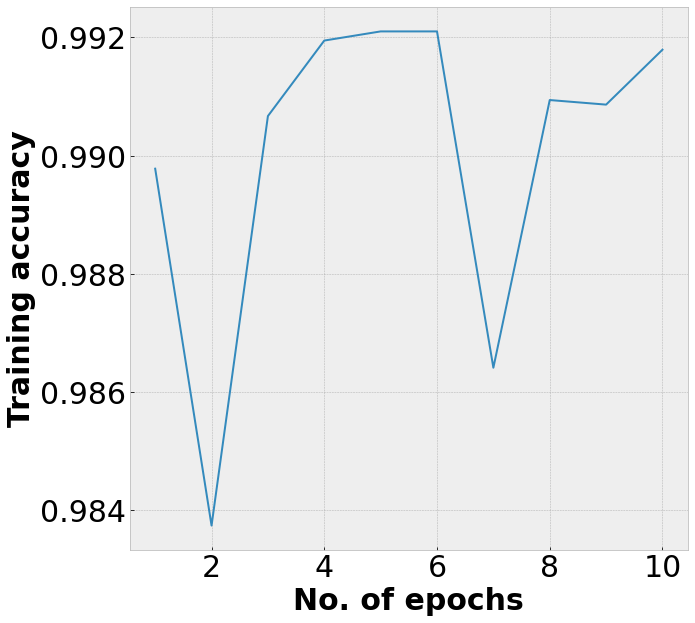

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

epoch = [i for i in range(1,11)]

plt.plot(epoch,yList_Dos_Train_Accuracy)



plt.xlabel("No. of epochs", fontsize = 30, fontweight = 'bold')
plt.ylabel("Training accuracy", fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.savefig("epochVstrain_acc.png", bbox_inches = "tight")
plt.savefig("epochVstrain_acc.pdf", bbox_inches = "tight")
plt.savefig("epochVstrain_acc.svg", bbox_inches = "tight")

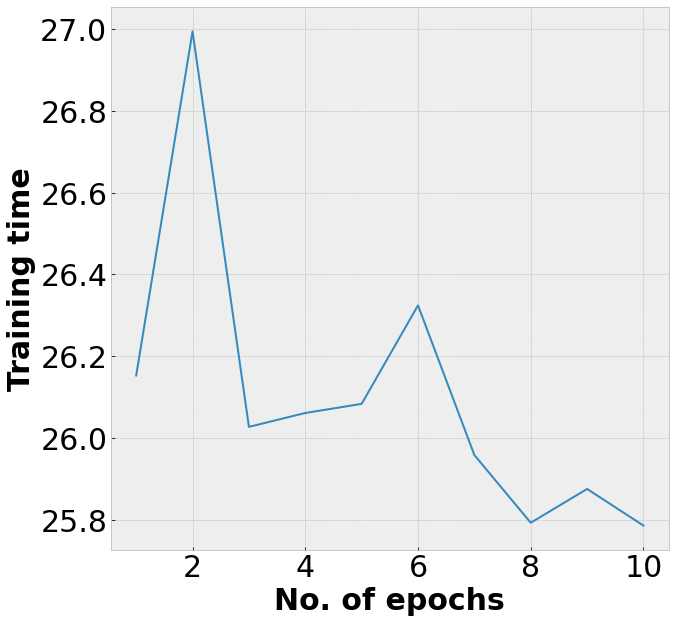

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

epoch = [i for i in range(1,11)]

plt.plot(epoch,yList_DoS_Train_Time)



plt.xlabel("No. of epochs", fontsize = 30, fontweight = 'bold')
plt.ylabel("Training time", fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.savefig("epochVs_train_time.png", bbox_inches = "tight")
plt.savefig("epochVs_train_time.pdf", bbox_inches = "tight")
plt.savefig("epochVs_train_time.svg", bbox_inches = "tight")

In [ ]:

cm_fuzzy=[[9292 ,  10],
 [   2, 2024]]

cm_spoof=[[9370,   86],
 [   3 ,3044]]


cm_dos=[[9379 ,  87],
 [   5 ,1598]]



cm_replay=[[5542,   38],
 [ 786 ,6170]]
 #replay


cm_mixed=[[17514,   406],
 [    3  ,6827]]

cm = np.array(cm_fuzzy)+np.array(cm_spoof)+np.array(cm_dos)+np.array(cm_replay)+np.array(cm_mixed)
print(cm)


tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

re = tp/(tp+fn)
pr = tp/(tp+fp)
f1 = 2*pr*re/(pr+re)
ac = (tp+tn) / (tp+tn+fp+fn)
print("pr.........."+str(pr))
print("re----"+str(re))

print("f1===="+str(f1))
print("ac====="+ str(ac))
print((tp+tn)/(tp+tn+fp+fn))



[[51097   627]
 [  799 19663]]
pr..........0.9878779676745805
re----0.9846038230306767
f1====0.9862381779579232
ac=====0.9802454769622918
0.9802454769622918


In [ ]:
!pip install xlsxwriter 

     |████████████████████████████████| 153kB 5.7MB/s 


In [ ]:
# import xlsxwriter module 
import xlsxwriter 

workbook = xlsxwriter.Workbook('overall.xlsx') 


worksheet = workbook.add_worksheet() 


worksheet.write('A1', str(pr)) 
worksheet.write('B1', str(re)) 
worksheet.write('C1', str(f1)) 
worksheet.write('D1', str(ac)) 

# Finally, close the Excel file 
# via the close() method. 
workbook.close() 


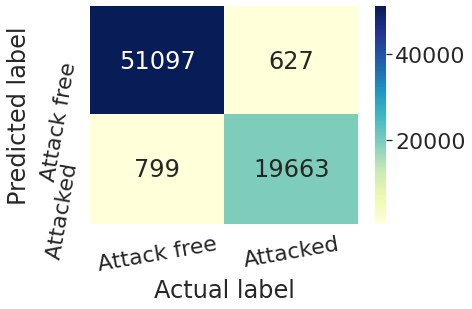

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline




cm_matrix = pd.DataFrame(data=cm, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_overall.pdf', bbox_inches = "tight")
plt.savefig('confusion_overall.PNG', bbox_inches = "tight")
plt.savefig('confusion_overall.svg', bbox_inches = "tight")

In [ ]:
#Getting all the features

import networkx as nx
import hashlib
import numpy as np

#Function for tracing the attacked and attackfree graph. Return a list which 
#contation the info that a graph is attacked or attack
def getAttackFreelist(filename):
  attacFreekList = []
  file_ = open(filename, 'r')


  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        attacFreekList.append(line.split())

  
  file_.close()
  print(len(attacFreekList))
  print(attacFreekList)
  return attacFreekList


def getFeatures(filename):

  attackFreeList = getAttackFreelist(filename)
  file_ = open(filename, 'r')

  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 


  graphNumber = len(ultimate_graphList)
# Iterating every graph
  allFeatureList = []
  allLabelList = []
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
    indegree = 0
    outdegree = 0
    
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    

    weighted_Feature_Set = nx.pagerank(G)
    
    edge = G.number_of_edges()
    node = G.number_of_nodes()

    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)
    maximum_pagerank_vertex = np.max(temp_list)
    minimum_pagerank_vertex = np.min(temp_list)
    std_pagerank = np.std(temp_list)
    varpagerank = np.var(temp_list)



    counter = 0
    in_deg = []
    out_deg = []
    for key,val in weighted_Feature_Set.items():
      in_deg.append(G.in_degree(key))
      out_deg.append(G.out_degree(key))
    
    maxInd = np.max(in_deg)
    minInd = np.min(in_deg)
    maxOut = np.max(out_deg)
    minOut = np.min(out_deg)

    allFeatureList.append([node,edge,maxInd,minInd,maxOut,minOut,median_pagerank_vertices,maximum_pagerank_vertex,
                            minimum_pagerank_vertex,std_pagerank,varpagerank])
    
    if attackFreeList[i][2] == 'False':
      allLabelList.append(1)
    else:
      allLabelList.append(0)
    
  return allFeatureList,allLabelList


  


  
allFeatureList,allLabelList = getFeatures('DosAttackGraph.txt')

print(len(allFeatureList))
print(allLabelList)



18328
[['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack', 'Free:', 'False'], ['Attack',

In [ ]:
import torch
import numpy as np

adjaceny = np.zeros((lenugl,lenugl))


for i in range(0,lenugl-1):
  adjaceny[i][i+1] = 1




nList = np.array(allFeatureList)
aList = np.array(adjaceny)

lList = np.array(allLabelList)



aList = torch.from_numpy(aList)
nList = torch.from_numpy(nList)
lList = torch.from_numpy(lList)


print(nList)

print(aList)

print(lList)





# print(idx_train)
# print(idx_val)
# print(idx_test)


tensor([[2.4000e+01, 4.1000e+01, 3.0000e+00,  ..., 1.6200e-02, 1.0976e-02,
         1.2047e-04],
        [2.4000e+01, 3.9000e+01, 4.0000e+00,  ..., 1.2780e-02, 1.2418e-02,
         1.5421e-04],
        [2.4000e+01, 3.9000e+01, 4.0000e+00,  ..., 1.2780e-02, 1.2418e-02,
         1.5421e-04],
        ...,
        [2.4000e+01, 3.6000e+01, 4.0000e+00,  ..., 1.6270e-02, 1.3746e-02,
         1.8897e-04],
        [2.4000e+01, 3.6000e+01, 4.0000e+00,  ..., 1.6270e-02, 1.3746e-02,
         1.8897e-04],
        [2.4000e+01, 4.1000e+01, 4.0000e+00,  ..., 1.5606e-02, 1.5427e-02,
         2.3800e-04]], dtype=torch.float64)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([0, 0, 0,  ..., 0, 0, 0])


In [ ]:
import math

import torch
import numpy as np


import time
import argparse
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import torch.nn as nn
import torch.nn.functional as F


class GraphConvolution(Module):

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        
        # print(in_features)
        # print(out_features)
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.DoubleTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.DoubleTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.matmul(input, self.weight)
        output = torch.matmul(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        #print(F.log_softmax(x, dim=1))
        return F.log_softmax(x, dim=1)


seed = 42
epochs = 200
lr = 0.01
weight_decay = 5e-4
hidden = 16
dropout =0.5
np.random.seed(seed)




adj, features, labels = aList, nList, lList

#adj, features, labels = aList[, nList, lList

f = int(lenugl*.7)
g = int(lenugl*.15)
h = int(lenugl*.15)

print(f)
print(g)
print(h)

idx_train = torch.LongTensor(range(f))
idx_test = torch.LongTensor(range(f,f+g))
idx_val = torch.LongTensor(range(f+g,f+g+h))

# Model and optimizer
print(features.shape)
model = GCN(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
#print(model)
optimizer = optim.Adam(model.parameters(),
                       lr=lr, weight_decay=weight_decay)


fastmode = False


def accuracy(output, labels, t = 0):
    preds = output.max(1)[1].type_as(labels)
    if t == 1:

      print(np.array(confusion_matrix(list(labels),list(preds))).T)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    #print(features.shape)
    output = model(features, adj)
    # print(output.shape)
    # print(output[idx_train].shape)
    # print(labels[idx_train].shape)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    if not fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        #print(features.shape)
        #print(model)
        output = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))


def test(t=0):
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    
    acc_test= accuracy(output[idx_test], labels[idx_test],t)
    
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))
    


# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
t_total = time.time()
test(1)
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))










12829
2749
2749
torch.Size([18328, 11])
Epoch: 0001 loss_train: 7.6337 acc_train: 0.4098 loss_val: 6.3732 acc_val: 0.0000 time: 3.1980s
Epoch: 0002 loss_train: 6.1403 acc_train: 0.4537 loss_val: 3.6720 acc_val: 0.0004 time: 3.2029s
Epoch: 0003 loss_train: 5.2571 acc_train: 0.4728 loss_val: 1.6822 acc_val: 0.0266 time: 3.2154s
Epoch: 0004 loss_train: 4.3784 acc_train: 0.4959 loss_val: 0.7081 acc_val: 0.6257 time: 3.2163s
Epoch: 0005 loss_train: 3.7808 acc_train: 0.5108 loss_val: 0.3234 acc_val: 0.9251 time: 3.2138s
Epoch: 0006 loss_train: 3.1041 acc_train: 0.5385 loss_val: 0.1696 acc_val: 0.9825 time: 3.2134s
Epoch: 0007 loss_train: 2.4855 acc_train: 0.5926 loss_val: 0.0965 acc_val: 0.9956 time: 3.2264s
Epoch: 0008 loss_train: 1.9026 acc_train: 0.6389 loss_val: 0.0577 acc_val: 0.9996 time: 3.2210s
Epoch: 0009 loss_train: 1.5366 acc_train: 0.6977 loss_val: 0.0386 acc_val: 1.0000 time: 3.2166s
Epoch: 0010 loss_train: 1.2613 acc_train: 0.7397 loss_val: 0.0468 acc_val: 1.0000 time: 3.2610s


In [ ]:
# cm = [[1612 ,  10],
#  [   5  ,793]]


tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

re = tp/(tp+fn)
pr = tp/(tp+fp)
f1 = 2*pr*re/(pr+re)
fpr = fp / (fp+tn)
print("pr.........."+str(pr))
print("re----"+str(re))

print("f1===="+str(f1))
print("fpr====="+ str(fpr))
print((tp+tn)/(tp+tn+fp+fn))

pr..........0.98989898989899
re----0.9932432432432432
f1====0.9915682967959528
fpr=====0.009708737864077669
0.9917355371900827


In [ ]:
import pandas as pd

square_node_data = pd.DataFrame(
    {"x": [1, 2, 3, 4], "y": [-0.2, 0.3, 0.0, -0.5]}, index=["a", "b", "c", "d"]
)
square_node_data

,x,y
a,1,-0.2
b,2,0.3
c,3,0.0
d,4,-0.5


      Nodes  Edges  ...  MaximumPagerank  MininumPagerank
No.                 ...                                  
1        27    112  ...         0.215139         0.011104
2        25     75  ...         0.359649         0.018228
3        25     88  ...         0.285778         0.015716
4        27     97  ...         0.276848         0.014271
5        27    137  ...         0.173902         0.013195
...     ...    ...  ...              ...              ...
1828     26     70  ...         0.077329         0.013768
1829     26     73  ...         0.073358         0.011842
1830     26     78  ...         0.067820         0.011954
1831     26     85  ...         0.071132         0.009662
1832     26     76  ...         0.086512         0.008505

[1832 rows x 9 columns]
StellarGraph: Undirected multigraph
 Nodes: 1832, Edges: 0

 Node types:
  default: [1832]
    Features: float32 vector, length 9
    Edge types: none

 Edge types:
